In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import math
import numpy as nm

In [4]:
df1 = pd.read_csv('pf10xIDC_pheno.csv')
df2 = pd.read_csv('pf10xIDC_counts.csv')


feature_names = df2.iloc[:, 0].tolist()

df2 = df2.drop(df2.columns[0], axis=1)
# feature_names
df2



,AAACCTGAGCCTCGTG.1,AAACCTGAGCCTTGAT.1,AAACCTGAGCTCCTTC.1,AAACCTGAGGACATTA.1,AAACCTGCAAGACGTG.1,AAACCTGCATGTCCTC.1,AAACCTGGTATATGGA.1,AAACCTGGTTTACTCT.1,AAACCTGTCAACACGT.1,AAACCTGTCCAAATGC.1,...,TTTGGTTGTTATCCGA.1,TTTGGTTTCAGTTGAC.1,TTTGGTTTCCGTAGTA.1,TTTGTCAAGCCAGTTT.1,TTTGTCAAGTCACGCC.1,TTTGTCACATATACCG.1,TTTGTCACATCATCCC.1,TTTGTCAGTTAAGACA.1,TTTGTCATCAACACGT.1,TTTGTCATCAACCATG.1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = []
for (columnName, columnData) in df2.iteritems():
    X.append(columnData.values.tolist())
Y = df1.bulk
print(Y)

0        late_troph
1       early_troph
2        late_troph
3       early_troph
4        late_troph
           ...     
6732           ring
6733     late_troph
6734     late_troph
6735     late_troph
6736     late_troph
Name: bulk, Length: 6737, dtype: object


In [6]:
df = pd.DataFrame(X, columns = feature_names)

In [7]:
# x = df.values.tolist()
# print(x == X)

In [8]:
df['bulk'] = Y

In [9]:
mcc = make_scorer(matthews_corrcoef)

In [10]:
x = df.drop(['bulk'], axis=1)

In [11]:
x

,PF3D7_1400200,PF3D7_1400700,PF3D7_1401100,PF3D7_1401200,PF3D7_1401300,PF3D7_1401400,PF3D7_1401500,PF3D7_1401600,PF3D7_1401700,PF3D7_1401800,...,PF3D7_0113800,PF3D7_0113900,PF3D7_0114000,PF3D7_0114500,PF3D7_0115000,PF3D7_0115100,PF3D7_0115300,PF3D7_0115400,PF3D7_0115600,PF3D7_0115700
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6732,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6734,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y = df['bulk']
str = 'PF3D7_1401500 PF3D7_1402900 PF3D7_1406000 PF3D7_1407100 PF3D7_1407700 PF3D7_1407900 PF3D7_1412900.1 PF3D7_1413200 PF3D7_1413400 PF3D7_1419800.2 PF3D7_1420200 PF3D7_1420700 PF3D7_1421200 PF3D7_1421500 PF3D7_1422600 PF3D7_1426200 PF3D7_1426800 PF3D7_1427300 PF3D7_1428500 PF3D7_1429300 PF3D7_1430100 PF3D7_1435200 PF3D7_1436200 PF3D7_1438100 PF3D7_1439900 PF3D7_1440300 PF3D7_1441600 PF3D7_1442200 PF3D7_1444700 PF3D7_1445900 PF3D7_1447700 PF3D7_1449200 PF3D7_1449600 PF3D7_1451600 PF3D7_1452000 PF3D7_1453800 PF3D7_1457700 PF3D7_1457800 PF3D7_1459800 PF3D7_1462000 PF3D7_1462800 PF3D7_1463600 PF3D7_1463800 PF3D7_1466100 PF3D7_1466700 PF3D7_1467900 PF3D7_1475500 PF3D7_1476500 PF3D7_1300800 PF3D7_1304300 PF3D7_1306300 PF3D7_1309800 PF3D7_1310200 PF3D7_1311100 PF3D7_1312450 PF3D7_1312600 PF3D7_1314700 PF3D7_1320300 PF3D7_1320700 PF3D7_1321100 PF3D7_1324400 PF3D7_1329100 PF3D7_1332900 PF3D7_1333100 PF3D7_1333500 PF3D7_1334300 PF3D7_1334400 PF3D7_1335000 PF3D7_1336800 PF3D7_1338400 PF3D7_1338500 PF3D7_1339800 PF3D7_1340600 PF3D7_1343500 PF3D7_1345900 PF3D7_1347400 PF3D7_1348900 PF3D7_1351600 PF3D7_1351800.1 PF3D7_1354900 PF3D7_1357100 PF3D7_1358700 PF3D7_1359400 PF3D7_1363600 PF3D7_1366000 PF3D7_1366600 PF3D7_1368000 PF3D7_1373400 PF3D7_1201300 PF3D7_1202100.1 PF3D7_1205500 PF3D7_1207900 PF3D7_1208400 PF3D7_1211700 PF3D7_1212500 PF3D7_1218400 PF3D7_1218900 PF3D7_1219100 PF3D7_1220700 PF3D7_1220900 PF3D7_1223500 PF3D7_1227600 PF3D7_1229500 PF3D7_1231200 PF3D7_1232400 PF3D7_1232800 PF3D7_1235500 PF3D7_1237100 PF3D7_1238300 PF3D7_1238400 PF3D7_1238500 PF3D7_1240100 PF3D7_1242900 PF3D7_1243900 PF3D7_1246500 PF3D7_1248000 PF3D7_1252200 PF3D7_1252500 PF3D7_1103100 PF3D7_1103700 PF3D7_1103900 PF3D7_1105000 PF3D7_1105100 PF3D7_1105600 PF3D7_1106500 PF3D7_1107700 PF3D7_1111400 PF3D7_1112100 PF3D7_1113000 PF3D7_1113600 PF3D7_1115300 PF3D7_1116000 PF3D7_1116100 PF3D7_1116200.1 PF3D7_1117100 PF3D7_1121600 PF3D7_1123400 PF3D7_1124100 PF3D7_1126500 PF3D7_1128700 PF3D7_1131100 PF3D7_1136700.1 PF3D7_1136800 PF3D7_1137300 PF3D7_1140600 PF3D7_1144900 PF3D7_1145300 PF3D7_1146000 PF3D7_1147400 PF3D7_1147800.1 PF3D7_1002900 PF3D7_1007100 PF3D7_1009000 PF3D7_1012100 PF3D7_1014300 PF3D7_1014700 PF3D7_1016300 PF3D7_1017300.1 PF3D7_1019100 PF3D7_1020100 PF3D7_1022300 PF3D7_1023400 PF3D7_1024800 PF3D7_1026400 PF3D7_1032600 PF3D7_1033000 PF3D7_1034100 PF3D7_1039000 PF3D7_1040300 PF3D7_0902300 PF3D7_0903900 PF3D7_0904300 PF3D7_0904500 PF3D7_0904700 PF3D7_0905900 PF3D7_0907300 PF3D7_0907400 PF3D7_0907700 PF3D7_0910800 PF3D7_0911600 PF3D7_0913000 PF3D7_0913300 PF3D7_0914000 PF3D7_0914700 PF3D7_0915000 PF3D7_0916400 PF3D7_0919600 PF3D7_0919900 PF3D7_0924800 PF3D7_0926200 PF3D7_0927200 PF3D7_0927500 PF3D7_0932100 PF3D7_0932600 PF3D7_0932900 PF3D7_0933600 PF3D7_0933800 PF3D7_0935900 PF3D7_0936000 PF3D7_0936500 PF3D7_0802200 PF3D7_0802700 PF3D7_0803000 PF3D7_0805700 PF3D7_0806100 PF3D7_0813300 PF3D7_0813600 PF3D7_0815900 PF3D7_0817300 PF3D7_0819700 PF3D7_0822900 PF3D7_0823400 PF3D7_0824500 PF3D7_0824700 PF3D7_0825000 PF3D7_0827800 PF3D7_0828000 PF3D7_0828500 PF3D7_0828700 PF3D7_0831700 PF3D7_0700100 PF3D7_0704400 PF3D7_0705600 PF3D7_0707300 PF3D7_0707600 PF3D7_0710800 PF3D7_0712400 PF3D7_0716400 PF3D7_0716600 PF3D7_0716800 PF3D7_0718100 PF3D7_0721800 PF3D7_0722700 PF3D7_0724200 PF3D7_0726900 PF3D7_0727900 PF3D7_0729700 PF3D7_0600200 PF3D7_0600700 PF3D7_0605000 PF3D7_0606600 PF3D7_0606900 PF3D7_0607700 PF3D7_0608000 PF3D7_0608800 PF3D7_0610400 PF3D7_0611000 PF3D7_0613800 PF3D7_0614300 PF3D7_0615000 PF3D7_0615500 PF3D7_0616900 PF3D7_0617800 PF3D7_0621900 PF3D7_0623200 PF3D7_0623300 PF3D7_0623400 PF3D7_0623700 PF3D7_0625900 PF3D7_0626800 PF3D7_0627400 PF3D7_0627900 PF3D7_0628500 PF3D7_0629000 PF3D7_0630800 PF3D7_0501100.2 PF3D7_0501400 PF3D7_0506400 PF3D7_0508300 PF3D7_0510200 PF3D7_0512800 PF3D7_0513700 PF3D7_0515700 PF3D7_0516700 PF3D7_0517200 PF3D7_0517300 PF3D7_0519400 PF3D7_0520000 PF3D7_0521700 PF3D7_0522000 PF3D7_0524300 PF3D7_0525000 PF3D7_0532100 PF3D7_0401600.2 PF3D7_0402400 PF3D7_0404200 PF3D7_0407600 PF3D7_0410600 PF3D7_0410800 PF3D7_0413300 PF3D7_0414200.2 PF3D7_0416500 PF3D7_0418400 PF3D7_0420600 PF3D7_0420700 PF3D7_0422300 PF3D7_0422500 PF3D7_0422700 PF3D7_0422900 PF3D7_0424600 PF3D7_0425800 PF3D7_0302500 PF3D7_0302700 PF3D7_0302800 PF3D7_0309600 PF3D7_0311100 PF3D7_0311300 PF3D7_0312400 PF3D7_0314000 PF3D7_0314600 PF3D7_0319300 PF3D7_0320500 PF3D7_0321900 PF3D7_0322200 PF3D7_0200100 PF3D7_0201500 PF3D7_0202000 PF3D7_0202500 PF3D7_0202900 PF3D7_0203600 PF3D7_0204500 PF3D7_0204900 PF3D7_0207400 PF3D7_0207600 PF3D7_0209000 PF3D7_0211500 PF3D7_0211700 PF3D7_0212500 PF3D7_0215000 PF3D7_0216100 PF3D7_0217000 PF3D7_0219300 PF3D7_0107300 PF3D7_0109400 PF3D7_0114500 PF3D7_0115300'
# print(str[0], str[len(str) -1])
temp = ""
arr = []
for s in range(0, len(str)):    
    if(str[s] != " "):
        temp += str[s]
    elif(str[s] == " "):
        arr.append(temp)
        temp = ""
        
arr.append(temp)
print(len(arr))
print(arr[122])
print(arr)
# print(x[arr])
selected = x[arr]

336
PF3D7_1105100
['PF3D7_1401500', 'PF3D7_1402900', 'PF3D7_1406000', 'PF3D7_1407100', 'PF3D7_1407700', 'PF3D7_1407900', 'PF3D7_1412900.1', 'PF3D7_1413200', 'PF3D7_1413400', 'PF3D7_1419800.2', 'PF3D7_1420200', 'PF3D7_1420700', 'PF3D7_1421200', 'PF3D7_1421500', 'PF3D7_1422600', 'PF3D7_1426200', 'PF3D7_1426800', 'PF3D7_1427300', 'PF3D7_1428500', 'PF3D7_1429300', 'PF3D7_1430100', 'PF3D7_1435200', 'PF3D7_1436200', 'PF3D7_1438100', 'PF3D7_1439900', 'PF3D7_1440300', 'PF3D7_1441600', 'PF3D7_1442200', 'PF3D7_1444700', 'PF3D7_1445900', 'PF3D7_1447700', 'PF3D7_1449200', 'PF3D7_1449600', 'PF3D7_1451600', 'PF3D7_1452000', 'PF3D7_1453800', 'PF3D7_1457700', 'PF3D7_1457800', 'PF3D7_1459800', 'PF3D7_1462000', 'PF3D7_1462800', 'PF3D7_1463600', 'PF3D7_1463800', 'PF3D7_1466100', 'PF3D7_1466700', 'PF3D7_1467900', 'PF3D7_1475500', 'PF3D7_1476500', 'PF3D7_1300800', 'PF3D7_1304300', 'PF3D7_1306300', 'PF3D7_1309800', 'PF3D7_1310200', 'PF3D7_1311100', 'PF3D7_1312450', 'PF3D7_1312600', 'PF3D7_1314700', 'PF3D7_1

In [22]:
heatmap_data = []
for (columnName, columnData) in selected.iteritems():
    temp = []
    li = columnData.values.tolist()
    c1 = 0
    c2 = 0
    c3 = 0
    c4 = 0
    for i in range(len(li)):
        if(Y[i] == "early_troph" ):
            c1 = c1 + li[i]
        elif(Y[i] == "late_troph" ):
            c2 = c2 + li[i]
        elif(Y[i] == "ring" ):
            c3 = c3 + li[i]
        elif(Y[i] == "schizont" ):
            c4 = c4 + li[i]
#     for i in range(len(li)):
#         if(Y[i] == "early_troph" ):
#             c1 =  max(c1, li[i])
#         elif(Y[i] == "late_troph" ):
#             c2 = max(c2, li[i])
#         elif(Y[i] == "ring" ):
#             c3 = max(c3, li[i])
#         elif(Y[i] == "schizont" ):
#             c4 = max(c4, li[i])
    error = 0
    a1 = (c1/ 1461) + error
    a2 = (c2/ 3201) + error
    a3 = (c3/ 1538) + error
    a4 = (c4/  537) + error
    temp.append(a1)
    temp.append(a2)
    temp.append(a3)
    temp.append(a4)
#     temp.append(math.log10(a1))
#     temp.append(math.log10(a2))
#     temp.append(math.log10(a3))
#     temp.append(math.log10(a4))
    heatmap_data.append(temp)


# print(heatmap_data)
min_value = 1000
rows = len(heatmap_data)
cols = len(heatmap_data[0])
for i in range(rows):
    for j in range(cols):
        if(heatmap_data[i][j]!= 0 and heatmap_data[i][j] < min_value):
            min_value = heatmap_data[i][j]

print(min_value)
for i in range(rows):
    for j in range(cols):
        heatmap_data[i][j] = math.log10(heatmap_data[i][j] + min_value)
print(heatmap_data)

0.00031240237425804435
[[-3.5052856741441323, -2.8063156698081135, -3.0165553009101433, -3.5052856741441323], [-1.8133096962066328, -1.1073456654720948, -2.5356322914438456, -1.196357776873377], [-1.6401707501511935, -1.398075704496264, -2.0907252259595346, -1.8745908258559818], [-0.9512482334539006, -1.078774412779557, -1.1556267589754212, -1.3650902387072472], [-3.001363620893871, -2.8063156698081135, -2.5356322914438456, -3.5052856741441323], [-2.237463677991107, -2.204255678480151, -1.8756163136771118, -3.5052856741441323], [-1.6809713649516613, -1.2086204838826011, -2.0572511449129025, -1.767711046638762], [-2.5156641140853337, -1.8520731603687886, -2.7924215071824485, -2.393963072353406], [-1.141577192515759, -0.568771931665239, -3.0165553009101433, -0.9882889346369736], [-3.001363620893871, -2.9032256828161698, -3.5052856741441323, -3.5052856741441323], [-1.8985027544567539, -0.749410818471641, -2.1665753752641232, -0.45774324272570355], [-0.1588451378114706, -0.0697598226454776

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

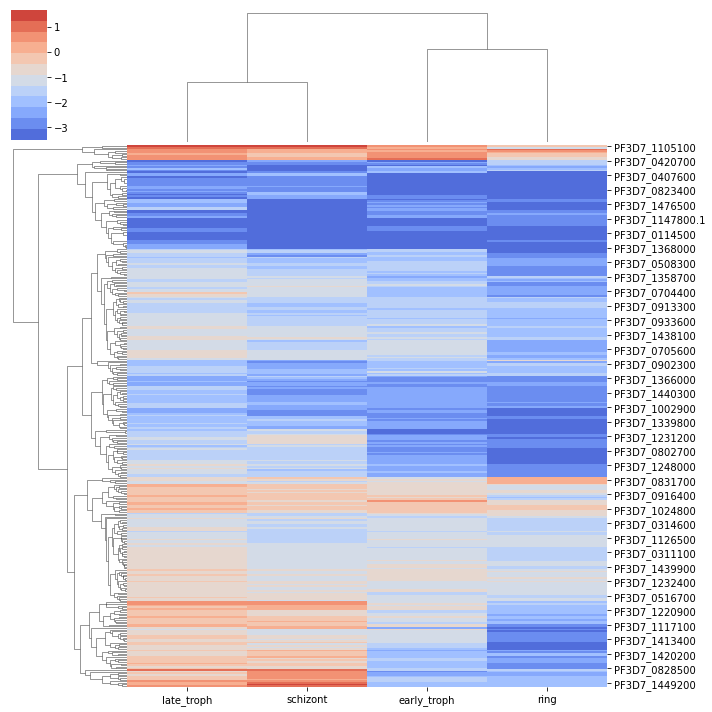

In [32]:
# fig, ax = plt.subplots(figsize=(20,15))
arr_heat = nm.array(heatmap_data)
# print(arr_heat)
panda_df = pd.DataFrame(data = arr_heat, index = arr, columns = ["early_troph",
                                   "late_troph", "ring", "schizont"])

# print(panda_df)  
c = sns.color_palette("coolwarm", 12)

# sn.color_palette("viridis", as_cmap=True)
# sinplot()
hm = sns.clustermap(data = panda_df, figsize=(10, 10), cmap = c)
plt.savefig('heatmap.png',bbox_inches='tight')
plt.show()